### 2021-01-10 17일차

In [1]:
# 오늘 할 일

# 1. 프로그래밍언어론 강의 듣기
# 2. 코딩테스트 문제 2개 풀기

#### 문제 1: 연결 요소의 개수(실버 2)
https://www.acmicpc.net/problem/11724

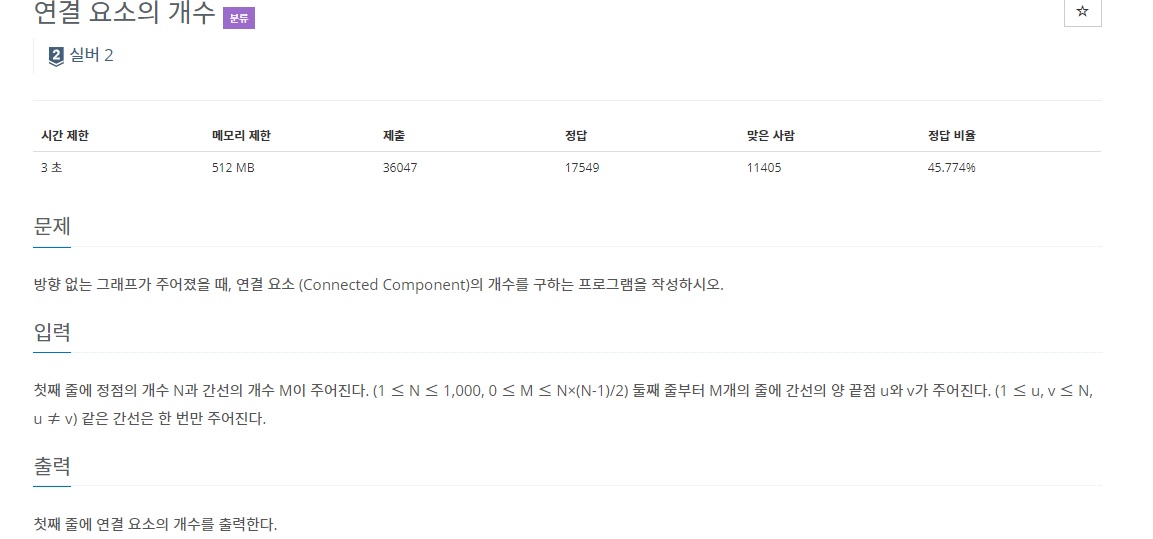

In [8]:
import sys
from collections import deque

N, M = map(int, input().split()) 
graph = [[] * N for _ in range(N + 1)]; visited = [0 for _ in range(N + 1)]

for i in range(M):
    x, y = map(int, input().split())
    graph[x].append(y)
    graph[y].append(x)
    
def bfs():
    queue = deque()
    count = 0
    for i in range(1, N + 1):
        if visited[i] == 0:
            queue.append(i)
            visited[i] = 1
            while queue:
                new_v = queue.popleft()
                if graph[new_v]: # 꼭 확인해줘여함
                    for k in graph[new_v]:
                        if visited[k] == 0:
                            queue.append(k)
                            visited[k] = 1
            count += 1
    return count
    
print(bfs())

6 8
1 2
2 5
5 1
3 4
4 6
5 4
2 4
2 3
1


#### 문제 2: 연구소(골드 5)
https://www.acmicpc.net/problem/14502

In [68]:
import sys
from collections import deque
from itertools import combinations
import copy

# 입력 받기
N, M = map(int, input().split()) # sys.stdin.readline()
graph = []; lis = [];

for i in range(N):
    graph.append(list(map(int, input().split()))) # sys.stdin.readline()
    
dx = [-1, 0, 1, 0]
dy = [0, -1, 0, 1]

# 바이러스 퍼트리기
def bfs(cp_graph):
    visited = [[0] * M for _ in range(N)]
    count = 0
    queue = deque()
    for x in range(N):
        for y in range(M):
            if cp_graph[x][y] == 2 and visited[x][y] == 0:
                queue.append((x, y))
                visited[x][y] = 1
                while queue:
                    new_x, new_y = queue.popleft()
                    for i in range(4):
                        nx = new_x + dx[i]
                        ny = new_y + dy[i]
                        if 0<= nx < N and 0<= ny < M and cp_graph[nx][ny] == 0 and visited[nx][ny] == 0 :
                            cp_graph[nx][ny] = 2
                            visited[nx][ny] = 1
                            queue.append((nx, ny))
    for n in range(N):
        for m in range(M):
            if cp_graph[n][m] == 0:
                count += 1
    return count

# 3개의 벽을 두는 경우의 수
def wall():
    value = []
    for n in range(N):
        for m in range(M):
            if graph[n][m] == 0:
                lis.append([n, m])
    lis_new = list(combinations(lis, 3))
    for i in lis_new:
        cp_graph = copy.deepcopy(graph)
        wall_list = i
        for j in wall_list:
            x, y = j
            cp_graph[x][y] = 1
        value.append(bfs(cp_graph))
    return max(value)
    
print(wall())

7 7
2 0 0 0 1 1 0
0 0 1 0 1 2 0
0 1 1 0 1 0 0
0 1 0 0 0 0 0
0 0 0 0 0 1 1
0 1 0 0 0 0 0
0 1 0 0 0 0 0
27
